## Forecast Metrics:
The motivation of this notebook is to bring together all the metrics generally used for forecasting.<br>
While the first half discusses the point forecast metrics, the second half moves on to address the probabilistic ones to give a complete picture.

Let's start with point metrics and from now,we indicate predicted variable by $\hat{y_i}$, observed variable by $y_i$ and the dataset size by $N$.

## Point forecast metrics:
<!-- #### Mean Error(ME): 
* Gives us the average deviations between observed and predicted values.$$ ME(y_i,\hat{y_i}) = \frac{1}{N} \sum_{i=0}^{N}(y_i - \hat{y_i}) $$

* Helps us to know the model's bias to under or overforecast.
* **<u>Best</u>:** Should be close to zero.<br>
* **<u>Drawbacks</u>:** Positive and Negative errors can neutralize each other and result into zero.Hence we will have no idea of the distribution of errors. -->

* Gives average magnitude of forecast errors. $$ MAE(y_i,\hat{y_i}) = \frac{1}{N} \sum_{i=0}^{N}|y_i - \hat{y_i}| $$
* Helps us to know the width of error distribution.
* **<u>Best</u>:** Should be close to zero.<br>

* Sometimes,it is useful to quantify the tails of the error distribution,as higher forecasting errors can cause higher disurbances. If we want to give more importance to higher forecasting errors, we can also use Mean Squared Error(MSE) defined as  
$$ MSE(y_i,\hat{y_i}) = \frac{1}{N} \sum_{i=0}^{N}(y_i - \hat{y_i})^2 $$
>Unless you are optimizing using this function, it might not be that useful, since we cant directly interpret it.
* In that case, one may want to take the square root of the above called as Root Mean Squared Error(RMSE) defined as below
$$ RMSE(y_i,\hat{y_i}) = \sqrt{\frac{1}{N} \sum_{i=0}^{N}(y_i - \hat{y_i})^2 }$$
>However it still lacks the interpretation as it just doesnot describe the average error alone and is dependent on the distribution of the squared error rather than the error.

***For assessing forecast across a single series, in general,<u> MAE</u> is preferred as it is easier to interpret and compute.
However, we cannot use it to compare forecast accuracy between various series because it is scale dependent.***

**So, it might be helpful, to have a quick glance at the scale independent metrics.**

### Scale independent metrics:
Source: https://robjhyndman.com/publications/accuracy-intermittent-demand/
pdf: https://robjhyndman.com/papers/foresight.pdf

#### Percentage error metrics:
Percentage error is usually given by $ \displaystyle PE(y_i,\hat{y_i}) =100\times\frac{(y_i - \hat{y_i})} {y_i} $
<br>
We can actually see many papers evaluating their based on the percentage error metrics like MAPE and sMAPE.
The most popular one among business practioners being scale-independent is **Mean Absolute percentage error(MAPE)**
which can be read as the average of the absolute percentage errors defined above. 
$$ MAPE(y_i,\hat{y_i}) = 100\times \frac{1}{N} \sum_{i=0}^{N}|\frac{(y_i - \hat{y_i})} {y_i}| = \frac{1}{N} \sum_{i=0}^{N}|PE| $$
However, it has it's own shortcomings as below:
* It becomes undefined when the actual value is 0.
* When the actual values are close to zero, it becomes extremely skewed and if we try to optimize on it, it may most likely undershoot the actual value.
* Also,it is asymmetric, it puts heavier penalty on those that exceed the actual than those that are lower than the actual, for the same amount of error.

There is also another metric called  **symmetric Mean Absolute percentage error(sMAPE)** mostly used in forecasting competitions.It was basically proposed to counter the boundlessness problem in MAPE.The absolute difference between $y_i$ and $\hat{y_i}$ is divided by half the sum of absolute values of the actual value $y_i$ and the forecast value $\hat{y_i}$
$$
sMAPE(y_i,\hat{y_i}) =\frac{100 \%}{N} \sum_{i=1}^{N} \frac{\left|\hat{y_i}-y_i\right|}{\left(\left|y_i\right|+\left|\hat{y_i}\right|\right) / 2}
$$

But it still is asymmetrical(Refer to this wikipedia [example](https://en.wikipedia.org/wiki/Symmetric_mean_absolute_percentage_error) for more).Generally, it is recommended not to use any percentage error based metrics when both forecast and true values can be zero.Also in case where variables can take both positive and negative variables.

#### Relative error based metrics:

Their principle is to divide error for each sample by some benchmark model, which generally is a naive model. 
Considering $\hat{{y_i}_b}$ as the forecast by some base line model, Relative absolute error can defined as 
$$RAE = \frac{1}{N} \sum_{i=1}^{N}|\frac{(y_i - \hat{y_i})}{(y_i -\hat{{y_i}_b}) }| $$

They also suffer from the upper bound limit problem, if the baselines model perfectly perfectly fits the target value.

#### Scale free error metrics:

Introduced by [Hyndman and Koehler](https://robjhyndman.com/publications/another-look-at-measures-of-forecast-accuracy/), they involve simply scaling the errors based on the insample MAE from a naive forecast method.
For non seasonal time series, Scaled error is defined as $$ Scaled error(y_i,\hat{y_i}) = \frac{(y_i - \hat{y_i})}{\frac{1}{T-1}\sum_{t=2}^{T}|y_t - y_{t-1}|} $$ <br>where $T$ is the length of the insample for that forecast. This implies $ y_{T+1} = y_i $<br>
<br>
For seasonal time series, a scaled error can be defined using seasonal naïve forecasts as follows:
 $$ Scaled error(y_i,\hat{y_i}) = \frac{(y_i - \hat{y_i})}{\frac{1}{T-m}\sum_{t=m+1}^{T}|y_t - y_{t-m}|} $$ 
 where $ m $ is the seasonal frequency.
<br>
* Because the numerator and denominator both involve values on the scale of the original data, this metrics is independent of the scale of the data.
* A scaled error is less than one if it arises from a better forecast than the average naïve forecast computed on the training data. Conversely, it is greater than one if the forecast is worse than the average naïve forecast computed on the training data.

The metric generally used in the class of scaled error metrics is **Mean Scaled Error Metric(MASE)** which is simply mean of abosulte value of the scaled metric defined above.

$$ MASE(y_i,\hat{y_i}) = \frac{1}{N} \sum_{i=1}^{N} \frac{|y_i - \hat{y_i}|}{\frac{1}{T-1}\sum_{t=2}^{T}|y_t - y_{t-1}|} $$



* Sometimes, there are chances of becoming infinite when all historical data are equal. 
* It has to be assumed that the period-to-period difference of the time series is stationary, so that the scaling factor is a consistent estimator of the scale of the series.

This completes our overview on the point forecast metrics.Lets move to the ones,we are intereseted in, the probabilistic forecasts.<br>
<br>
**Please note that all these are error metrics and hence lower the better. Also one can easily extend them to multi step forecasting, by calculating errors for each step in the forecast horizon and taking average on the whole.**

## Probabilistic forecast metrics:

* Probabilistic forecasts corresponds to the estimation of the statistical distribution of a future event and hence generate forecasts represented by predictive distributions which can be defined by Probability density function(PDF) or a cumulative distribution function(CDF), where CDF of a random variable X evaluated at x is $\displaystyle CDF_X(x) = Probability(X \leq x)$

* Probabilistic forecasts can be generated by nonparametric or parametric approaches. 
    * Nonparametric methods do not make any assumptions about the shape of the density and concentrate on finding a set of quantile values by minimizing quantile/pinball loss for those quantiles. More of these discrete estimates helps to summarize the CDF.
    * On the other hand, parametric methods assume a parametric distribution and seek parameters that optimize the predictive distribution by minimizing loss like negative log likelihood of that distribution.
    
#### Numerical scores:
* One may present the evaluation of their probabilistic forecasts in terms of numerical score like CRPS,Ignorance score,Mean Interval Score,Quantile score etc.
A score is said to be proper when perfect forecasts are given best score value and these scores have to proper to be sure of the validity of the results.

#### Quantile score:
Suppose, we want to estimate to conditional median or other quantiles, this score can be used to evaluate the loss function, also called pinball loss.
> * Recall that  a quantile $q_{\tau}$ indicates that there is a probability ${\tau}$ that the target variable occurs below $q_{\tau}$
* For a random variable $y$ with cumulative distribution function $F$ is defined as $q_{\tau}=F^{-1}(\tau)=\inf \{y: F(y) \geqslant \tau\}$ where $\tau \in[0,1]$
    * Without any assumption on the distribution,using these set of quantiles spanning the unit interval, we can get discrete estimates of predictive CDF.
    * Also Prediction Intervals can be calculated.
    
To estimate a quantile $\tau \in[0,1]$, with true value $y_i$ and the predicted value at that quantile $\hat{y_i}$,the quantile loss is defined as
<br>
<br>
$$
L_{\tau}(y, \hat{y})= \bigg[(\tau-1)\sum_{i\in y_{i}<\hat{y}_{i}}\left|y_{i}-\hat{y}_{i}\right|\bigg]+\bigg[\tau\sum_{i \in y_{i} \geq \hat{y}_{i}}\left|y_{i}-\hat{y}_{i}\right|\bigg]
$$
and this has to be divided by the length of the dataset $N$ 
<br>
* When $\tau = 0.5$, that is penalizing the estimates both above and below the true value equally, we get median.
* For lower quantiles(or the ones which are expected to appear less probably), the estimates which are above true value are highly penalized than the others and for the higher quantiles, the estimates which are below the true value are highly penalized than the others,which is what we expect.  
* It is negatively oriented, lower the better.
* Please note that it is non-differentiable at 0.

#### Interval score

Proposed by [Gneiting and Raftery](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/j.1467-9868.2007.00587.x), the interval score helps us to calibrate the quality of prediction intervals.
Since, we now know that we can estimate quantiles using the above quantile loss function, we can then very well deduce the prediction intervals.
><u>Just a quick recall to Prediction intervals</u>:
* Prediction intervals(PI) define the range of values within which an observation is expected to be with a certain probability which is generally referred to as nominal coverage rate.For a significance level $\alpha$, the coverage rate is given by $(1-\alpha)100\%$ 
* To determin PI, it is necessary to choose the way it should be centered on the PDF as stated in this [paper](https://onlinelibrary.wiley.com/doi/abs/10.1002/we.230) by Prof.Pinson and collegaues and it is generally centered on the median.
*  A central PI with a coverage rate of $(1-\alpha) 100 \%$ is estimated by using the quantile $ \left(\hat{q}_{\tau = \alpha / 2}\right) $ as the lower bound and the $(1-\alpha / 2)$ quantile $\left(\hat{q}_{\tau = 1-\alpha / 2}\right)$ as the upper bound.
* So, a PI with $(1-\alpha) 100 \%$ nominal coverage rate is given by
$\widehat{P I}_{(1-\alpha) 100\%}=\left[\widehat{q}_{\tau=\alpha / 2}, \hat{q}_{\tau =1-\alpha / 2}\right]$

So the interval score is defined as follows:
$$ IS_{\alpha} = \bigg[\left ( U_{i}-L_{i}\right)\bigg]+\bigg[\frac{2}{\alpha}\left(L_{i}-y_{i}\right) {\Large\mathbb{1}} \left\{y_{i}<L_{i}\right\}\bigg]+\bigg[\frac{2}{\alpha}\left(y_{i}-U_{i}\right) {\Large\mathbb{1}}\left\{y_{i}>U_{i}\right\}\bigg] $$

   * where $U_{i}$ and $L_{i}$ represent upper and lower prediction bounds which can be estimated either by quantiles as stated above or from the estimated parameters like standard deviation e.g. $\hat{y}_{i} \pm c \hat{\sigma}$ where $c$ is the coverage probability.<br>
   * $y_i$ is the future observations of the series, $\alpha$ is the significance level and ${\Large{\mathbb{1}}}$ is the indicator function (being 1 if $y_i$ is within the postulated interval and 0 otherwise).For a $95\%$ prediction interval,$\alpha = 0.05$
   
So, while the last two parts of the score indicate the penalty for the estimates where the future points are outside bounds the first part of the score indicates the width of the prediction interval and adds to the penalty as we want it to be low.

* Taking the mean of the above Interval score gives us the **Mean Interval score(MIS)**, which were using in our analysis.
* The lower the better.


#### Continuous ranked probability score(CRPS):
[CRPS](https://journals.ametsoc.org/doi/full/10.1175/1520-0434%282000%29015%3C0559%3ADOTCRP%3E2.0.CO%3B2)
is just the mean square error (MSE) of your predicted cumulative density function (CDF) and the true CDF.It is defined as follows:

$$
CRPS=\frac{1}{N} \sum_{i=1}^{N} \int_{-\infty}^{+\infty}\left[\hat{F}_{y_{pred}}^{i}(y)-F_{y_{obs}}^{i}(y)\right]^{2} dy
$$

where $\hat{F}_{y_{pred}}(y)$ is the predictive CDF of the target variable $y$ and $F_{y_{obs}}(y)$ is a cumulative-probability step function that jumps from 0 to 1 at the point where the forecast variable $x$ equals the observation $\left.y_{obs} \text { (i.e.} F_{y_{obs}}(y)=1_{\left[y \geq y_{obs}\right]}\right)$

* This metric notably differs from simpler metrics such as MAE because of its asymmetric expression: while the forecasts are probabilistic, the observations are deterministic. 
* Unlike the pinball loss function, the CRPS does not focus on any specific point of the probability distribution but considers the distribution of the forecasts as a whole.
* For deterministic forecasts, it turns out to be **Mean Absolute Error(MAE)**.
* It is negatively oriented(lower values are better) and is in the same scale as the target variable.
* The lack of closed form of the associated integral sometimes makes it difficult to apply.

#### Ignorance score(IGN):
(Referred from [link](https://journals.ametsoc.org/doi/pdf/10.1175/MWR2904.1))<br>
(Also this is what were using as main loss function namely Negative log likelihood)<br>
<br>
Also called as the log score or divergence, it is simply the negative logarithm of the predictive PDF verified at the observed value $y_i$ and is defined as follows:
$$\operatorname{ign}(f, y_i)=-\log {f(y_i)}$$

In the case of a normal predictive PDF with mean $\mu$ and variance $\sigma^{2},$ we have

$$\operatorname{ign}\left[\mathcal{N}\left(\mu, \sigma^{2}\right), y\right]=\frac{1}{2} \ln \left(2 \pi \sigma^{2}\right)+\frac{(y-\mu)^{2}}{2 \sigma^{2}}$$

and the average ignorance is
$$
\begin{aligned}
\mathrm{IGN} &=\frac{1}{n} \sum_{i=1}^{n} \operatorname{ign}\left(F_{i}, y_{i}\right) \\
&=\frac{1}{n} \sum_{i=1}^{n}\left[\frac{1}{2} \ln \left(2 \pi \sigma_{i}^{2}\right)+\frac{\left(y_{i}-\mu_{i}\right)^{2}}{2 \sigma_{i}^{2}}\right]
\end{aligned}$$

* Both CRPS and IGN are negatively oriented scores, in that a smaller value is better, and both scores are proper, meaning that they reward honest assessments.
* However, a key difference between the ignorance score and the continuous ranked probability score is that,CRPS grows linearly in the normalized prediction error, $z \equiv$ $(y-\mu) / \sigma,$ while IGN grows quadratically in $z$ Hence, the ignorance score assigns harsh penalties to particularly poor probabilistic forecasts, and can be exceedingly sensitive to outliers and extreme events.




#### Properties for good quality Probabilistic forecasts :
(Referred from [link](https://www.sciencedirect.com/science/article/abs/pii/S0038092X19310382))

Besides numerical score one can also look at some desired properties of probabilistic forecasts to evaluate their methods.
They are mainly reliability , sharpness and resolution.

#### Reliability:

* Reliability or calibration refers to the statistical consistency between the forecasts and the observations.
* In other terms, the nominal coverage rate of the prediction intervals should be equal to the empirical one (e.g. a $90 \%$ PI should cover $90 \%$ of the observations). 
* The reliability property is an important prerequisite as non reliable forecasts would lead to a systematic blas in subsequent decision-making processes([Source](https://onlinelibrary.wiley.com/doi/abs/10.1002/we.230))

To measure reliability, there exists a metric called Prediction Interval Coverage probability(PICP) which is defined as below:

$$
\mathrm{PICP}=\frac{1}{N} \sum_{i=1}^{N} c_{i} $$

where $N$ is the number of samples, and $c_{i}$ is the indicator of PICP and is defined as
$$
c_{i}=\left\{\begin{array}{ll}
{1,} & {y_{i} \in PI^{\alpha}} \\
{0,} & {y_{i} \notin PI^{\alpha}}
\end{array}\right.
$$

where $y_i$ is the observed value and $PI^{\alpha}$ indicates estimated predicted interval for significance level $\alpha$
<br>
It is expected that the above coverage probability PICP should asymptotically converge to the nominal confidence level given by$100(1-\alpha)\%$ 

#### Resolution:

Resolution measures the capacity of a forecasting model to issue forecasts that are case-dependent.<br>
To understand it,consider the following example
>Imagine a distribution built from all the available past data of the parameter to forecast. The climatological forecast uses this unique distribution to forecast any future events. A high resolution forecasting system generates forecasts that differ from the climatology and, as a consequence, forecasts that are significantly different from each other. Climatological forecasts are perfectly reliable though having no resolution. Consequently, a skillful probabilistic forecasting system should issue reliable forecasts and with high resolution.

<br>
From a statistical point of view, resolution amounts to evaluate the capacity of the forecast system to produce different density forecasts depending on the forecast conditions (i.e. the predictive distributions are not only conditioned by the value of the predictand) (Pinson et al, 2007 ). For instance, the prediction intervals may exhibit increasing widths with increasing forecast horizon. Also, regarding the solar irradiance (GHI), the width of the PIs may vary according the sun's position in the sky.

There's no unique mathematical way to establish Resolution measure.However, there are studies which try to study Resolution by decomposing numerical scores into uncertainty,reliability and resolution.

#### Sharpness:
* Sharpness evaluates how informative the forecasts are. Practically, sharpness refers to the concentration of the predictive distributions. 
* Sharpness is a function of the forecasts only and does not depend on the observations. Consequently, a forecasting system can produce sharp forecasts yet being useless if those probabilistic forecasts are not reliable.

* A probabilistic forecast is sharp if prediction intervals are shorter on average than prediction intervals derived from naive methods, such as climatology or persistence.

As per [Pinson et.al]((https://onlinelibrary.wiley.com/doi/abs/10.1002/we.230)),the sharpness of the predictive distributions can be assessed by calculating the mean size of the central prediction intervals.
<br>
Sharpness is given by
$$ \text Sharpness_\alpha =\frac{1}{N} \sum_{i=1}^{N}\left(\hat{U_i}-\hat{L_i}\right)$$
where $\hat{U_i}$ and $\hat{L_i}$ upper and lower bounds estimated for a signifcance level $alpha$ either by quantile methods or from parameters of a predictive distribution.

* Lower the sharpness value, the better forecasts. 

Here ends our high level discussion on forecasting metrics,there may be other metrics that are being used, but most of them broadly come under these types and having a good understanding of the above can help in comprehending any new metric.

Note: All the metrics discussed above can be extended for multi step forecasting as well and are generally expected to become worse as we move further in the forecast horizon. 

Of the above discussed metrics, we are currently using RMSE, Sharpness, Reliability and Mean Interval Score.

### Using metrics class in a program

The `proloaf.metrics` provides an implementation for these metrics. You can either import a metric directly or create a metric-object dynamically by using the `get_metric(...)`function.
Direct import is recommended where feasable.


In [1]:
from proloaf.metrics import NllGauss, get_metric
loss_1 = NllGauss(alpha=0.05)
loss_2 = get_metric("nllgauss",alpha=0.05)

Both ways are equivalent.
Each metric has a static function called `func(...)` which defines the raw mathematical implemenation of the metric.
Creating an object however will allow to define all parameters (like `alpha`) at creation time which will then be used each time the object is called.
It also allows to use the convinience methods `get_prediction_interval(...)` and `from_prediction_interval(...)` to generate a confidence interval and expectation values for the forecast horizon as a kind of normalized representation of the forecast and calculate other metrics from it.
This can be done since `utils.Modelhandler.Modelwrapper` saves the metric it was trained with.


In [4]:
from proloaf.modelhandler import ModelHandler
import pandas as pd
import proloaf.datahandler as dh
import proloaf.tensorloader as tl
import torch
import numpy as np
import logging

logging.getLogger("root").setLevel("INFO")

model = ModelHandler.load_model("../oracles/opsd_recurrent.pkl")

df = pd.read_csv("../data/opsd.csv", sep=";")
df_new = dh.fill_if_missing(df, periodicity=24)
df_new = dh.set_to_hours(df_new, timecolumn="Time", freq="h")
df_new: pd.DataFrame = model.scalers.transform(df_new).astype(np.float32)

# test_data_loader = tl.make_dataloader(
#     df_new,
#     model.target_id,
#     model.encoder_features,
#     model.decoder_features,
#     history_horizon=73,
#     forecast_horizon=168,
#     shuffle=False,
# )

inputs_enc = torch.tensor(df_new.iloc[: model.history_horizon].filter(model.encoder_features).to_numpy()).unsqueeze(0)
inputs_enc_aux = torch.tensor(df_new.iloc[: model.history_horizon].filter(model.aux_features).to_numpy()).unsqueeze(0)
inputs_dec = torch.tensor(
    df_new.iloc[model.history_horizon : model.history_horizon + model.forecast_horizon]
    .filter(model.decoder_features)
    .to_numpy()
).unsqueeze(0)
inputs_dec_aux = torch.tensor(
    df_new.iloc[model.history_horizon : model.history_horizon + model.forecast_horizon]
    .filter(model.aux_features)
    .to_numpy()
).unsqueeze(0)
last_value = torch.tensor(df_new.iloc[model.history_horizon - 1].filter(model.target_id).to_numpy()).unsqueeze(0)
print(last_value.shape)
prediction = model.predict(
    inputs_enc=inputs_enc,
    inputs_enc_aux=inputs_enc_aux,
    inputs_dec=inputs_dec,
    inputs_dec_aux=inputs_dec_aux,
    last_value=last_value,
)
print(model.output_labels)
# print(model.output_labels)
quant_pred = model.loss_metric.get_quantile_prediction(predictions=prediction, quantiles=[0.975, 0.5, 0.025]).values

print(quant_pred)

2024-10-21 14:23:41 - datahandler - INFO - No missing data
torch.Size([1, 2])
['expected_value', 'log_variance']
torch.Size([1, 24, 2, 2])
tensor([[[[0.5506, 0.3690, 0.1873],
          [0.6710, 0.5315, 0.3919]],

         [[0.6379, 0.4311, 0.2244],
          [0.7307, 0.5696, 0.4084]],

         [[0.7785, 0.5284, 0.2784],
          [0.8262, 0.6272, 0.4282]],

         [[0.8689, 0.5992, 0.3296],
          [0.8998, 0.6708, 0.4417]],

         [[0.9059, 0.6433, 0.3807],
          [0.9326, 0.6995, 0.4664]],

         [[0.9174, 0.6671, 0.4167],
          [0.9392, 0.7147, 0.4902]],

         [[0.9226, 0.6789, 0.4351],
          [0.9418, 0.7220, 0.5022]],

         [[0.9243, 0.6832, 0.4422],
          [0.9426, 0.7244, 0.5062]],

         [[0.9235, 0.6827, 0.4418],
          [0.9418, 0.7233, 0.5048]],

         [[0.9209, 0.6783, 0.4357],
          [0.9399, 0.7197, 0.4996]],

         [[0.9169, 0.6710, 0.4251],
          [0.9373, 0.7145, 0.4917]],

         [[0.9120, 0.6622, 0.4123],
          [

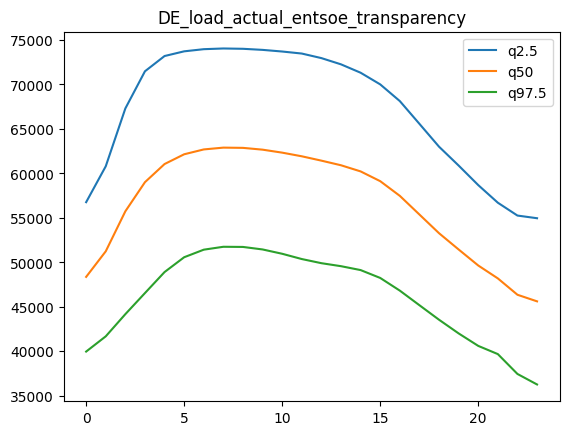

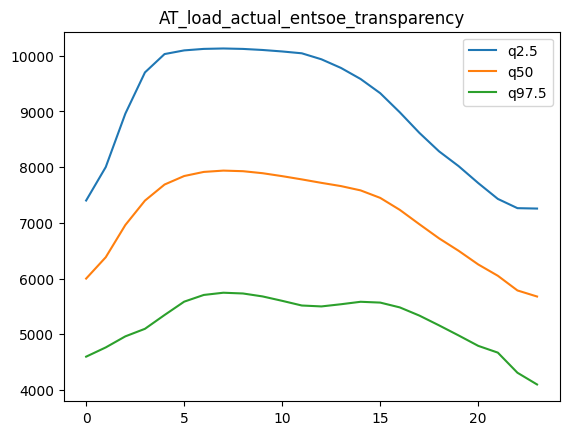

In [12]:
from matplotlib import pyplot as plt

np_pred = quant_pred.detach().squeeze().numpy()
for n_feat, feat in enumerate(model.target_id):
    plt.figure(n_feat)
    plt.title(feat)
    np_pred[:,n_feat,:] = model.scalers.manual_inverse_transform(np_pred[:,n_feat,:], scale_as=feat)
    plt.plot(np_pred[:,n_feat,0], label="q2.5")
    plt.plot(np_pred[:,n_feat,1], label="q50")
    plt.plot(np_pred[:,n_feat,2], label="q97.5")
    plt.legend()